# 1. Dimensionality Reduction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

In [5]:
#Завантажимо дані, виведемо назви колонок
try:
    df = pd.read_csv('processed_data_encoding.csv')
    print('Датасет завантажено успішно')
except FileNotFoundError:
    print('Файл не знайдено. Будь ласка, перевірте, чи правильно ви завантажили дані')
except Exception as e:
    print(f'Виникла проблема: {e}')

Датасет завантажено успішно


In [7]:
#Завантажимо перші рядки датасету 
df.head()

Gender  Ever_Married       Age  Graduated  Work_Experience  Spending_Score  \
0       0             0  0.057554          0              0.1               0   
1       1             1  0.287770          1              0.1               1   
2       1             1  0.705036          1              0.1               0   
3       0             1  0.705036          1              0.0               2   
4       1             1  0.316547          1              0.1               2   

   Family_Size  Segmentation  Profession_Doctor  Profession_Engineer  ...  \
0     0.500000             3                  0                    0  ...   
1     0.333333             0                  0                    1  ...   
2     0.000000             1                  0                    1  ...   
3     0.166667             1                  0                    0  ...   
4     0.833333             0                  0                    0  ...   

   Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
0                      1                     0                  0   
1                      0                     0                  0   
2                      0                     0                  0   
3                      0                     0                  1   
4                      0                     0                  0   

   Profession_Marketing  Category_Cat_2  Category_Cat_3  Category_Cat_4  \
0                     0               0               0               1   
1                     0               0               0               1   
2                     0               0               0               0   
3                     0               0               0               0   
4                     0               0               0               0   

   Category_Cat_5  Category_Cat_6  Category_Cat_7  
0               0               0               0  
1               0               0               0  
2               0               1               0  
3               0               1               0  
4               0               1               0  

[5 rows x 22 columns]

In [9]:
#Виведемо розмір датасету
print('Розмір датасету : ', df.shape)

Розмір датасету :  (8068, 22)


## Principal Component Analysis

In [12]:
# Визначимо features and labels
X = df.drop(columns=['Segmentation'])  # 'Segmentation' -> цільова змінна
Y = df['Segmentation']

# Застосуємо Principal Component Analysis (PCA) 
pca = PCA ()
X_pca = pca.fit_transform(X)

In [14]:
# Перевіряємо, чи дропнулась Segmentation
X_pca.shape

(8068, 21)

In [16]:
# Обчислюємо дисперсії
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

print('Explained variance', exp_var_pca)
print('Cumulative explained variance', cum_sum_eigenvalues)

Explained variance [0.28103381 0.125034   0.10160442 0.0852951  0.0601409  0.04414488
 0.04284546 0.0384178  0.03582083 0.03132317 0.02992797 0.02411338
 0.02379104 0.01675292 0.01618975 0.01200303 0.0113789  0.00760367
 0.00681813 0.00479422 0.00096665]
Cumulative explained variance [0.28103381 0.40606781 0.50767222 0.59296732 0.65310822 0.6972531
 0.74009855 0.77851635 0.81433718 0.84566035 0.87558832 0.8997017
 0.92349274 0.94024566 0.95643541 0.96843844 0.97981734 0.98742101
 0.99423914 0.99903335 1.        ]


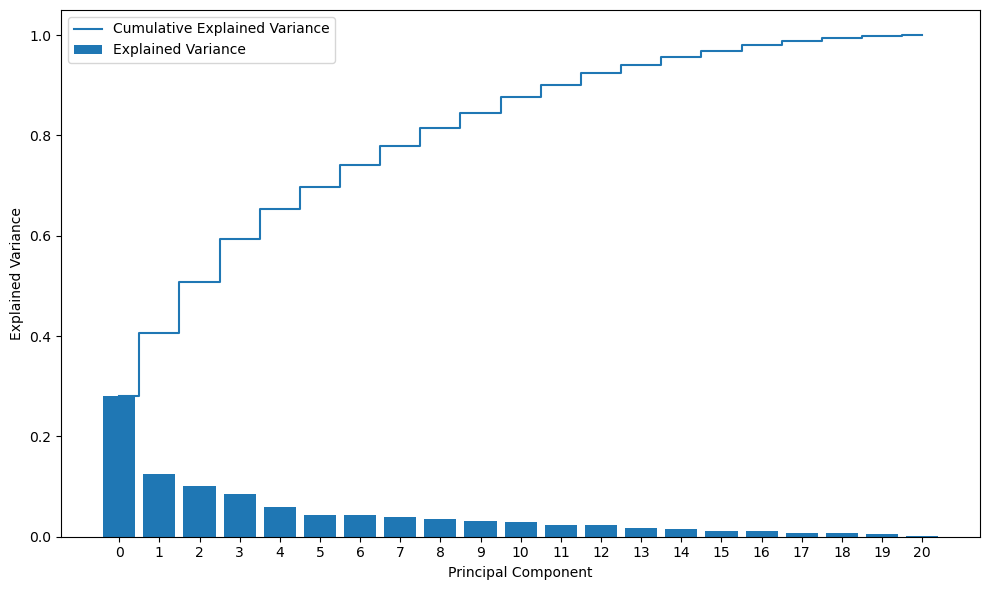

In [18]:
# Візуалізуємо результат
plt.figure(figsize=(10, 6))
plt.bar(range(len(exp_var_pca)), exp_var_pca, align='center', label='Explained Variance')
plt.step(range(len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(range(len(exp_var_pca)))  # Встановлення правильних значень для осі x
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [20]:
# Знижуємо розмірність до двох
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': Y})

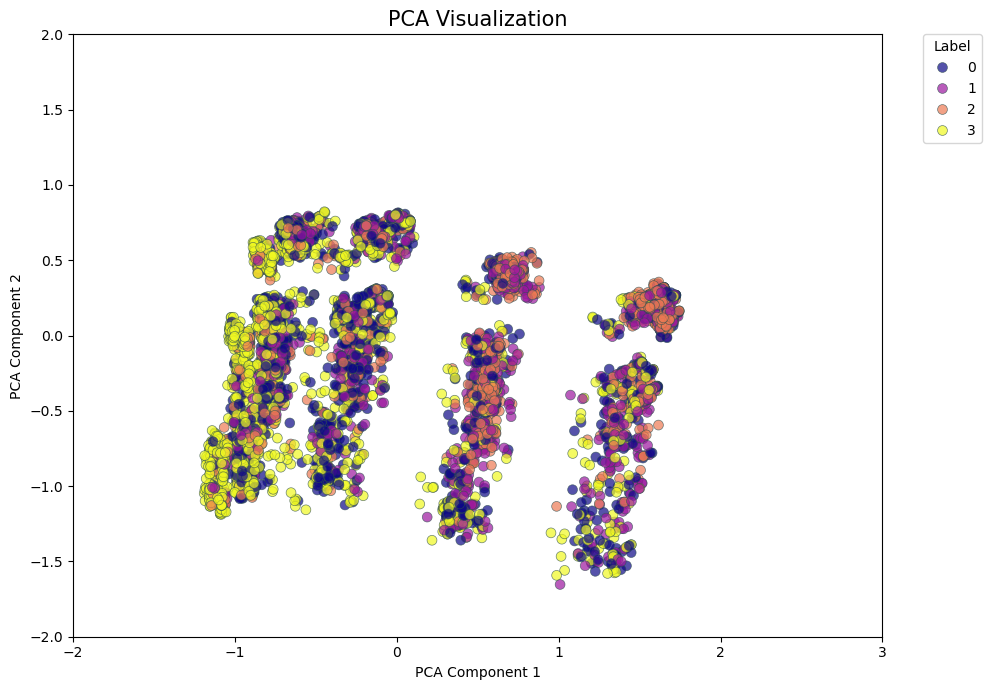

In [22]:
# Візуалізуємо результат
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(
    x='pca_1',
    y='pca_2',
    hue='label',
    palette='plasma',
    data=pca_result_df,
    ax=ax,
    s=50,
    edgecolor='darkslategrey',
    linewidth=0.5,
    alpha=0.7
)

# Встановлюємо межі осей, щоб краще побачити дані
ax.set_xlim(-2, 3)  
ax.set_ylim(-2, 2) 

# Налаштування графіка
ax.set_title('PCA Visualization', fontsize=15)
ax.set_xlabel('PCA Component 1', fontsize=10)
ax.set_ylabel('PCA Component 2', fontsize=10)
ax.legend(title='Label', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.tight_layout()

plt.show()

## tSNE

In [25]:
from sklearn.manifold import TSNE

#Знижуємо розмірність до двох
tsne = TSNE(n_components = 2)
tsne_result = tsne.fit_transform(X)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': Y})

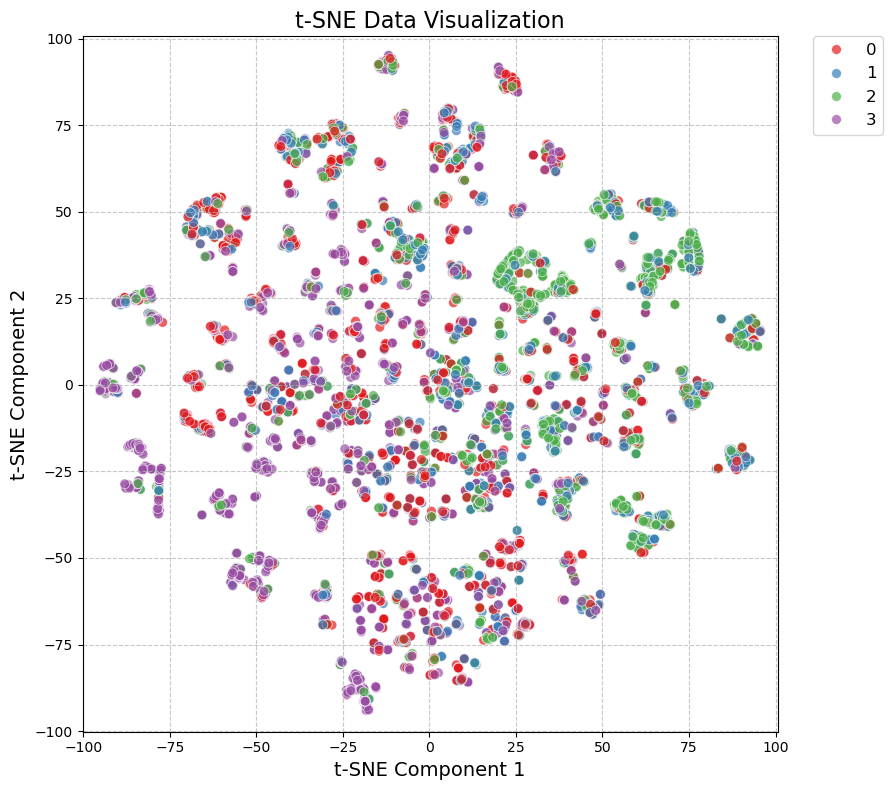

In [26]:
#Візуалізуємо дані

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=50, palette='Set1', alpha=0.7)

lim = (tsne_result_df[['tsne_1', 'tsne_2']].min().min() - 5, tsne_result_df[['tsne_1', 'tsne_2']].max().max() + 5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

ax.set_title('t-SNE Data Visualization', fontsize=16)
ax.set_xlabel('t-SNE Component 1', fontsize=14)
ax.set_ylabel('t-SNE Component 2', fontsize=14)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 2. Color Quantization using K-Means

In [30]:
from time import time
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

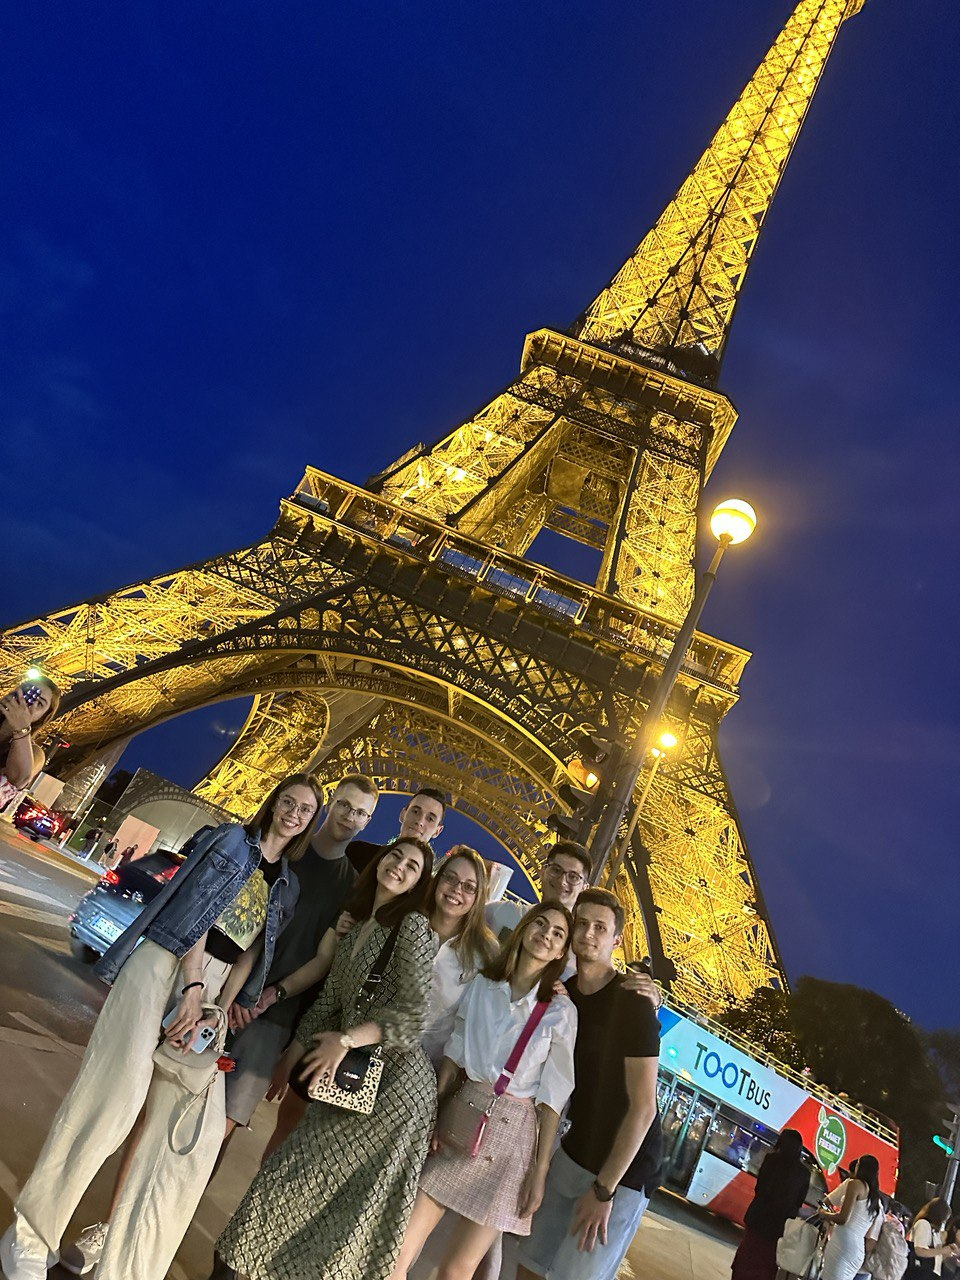

In [32]:
# Загружаємо фото
image_path = 'paris.jpeg'
image = Image.open(image_path)
image

In [34]:
# Конвертуємо фото в RGB формат і створюємо масив
image_array = np.array(image.convert("RGB"), dtype=np.float64) / 255

In [36]:
# Знаходимо кількість унікальних кольорів
unique_colors = np.unique(image_array.reshape(-1, image_array.shape[2]), axis=0)
num_unique_colors = len(unique_colors)
print("Унікальні кольори на фото", num_unique_colors)

Унікальні кольори на фото 224319


In [38]:
# Функція для квантізації кольорів
def color_quantization(image_array, n_colors):
    # Перетворюємо зображення на 2D-масив пікселів
    width, height, depth = image_array.shape
    reshaped_image_array = np.reshape(image_array, (width * height, depth))
    
    # Використовуємо KMeans для квантізації кольорів
    image_array_sample = shuffle(reshaped_image_array, random_state=0, n_samples=1000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(reshaped_image_array)
    
    # Відтворюємо зображення за допомогою центрів кластерів
    quantized_image = kmeans.cluster_centers_[labels]
    quantized_image = np.reshape(quantized_image, (width, height, depth))
    return quantized_image

In [40]:
# Визначаємо рівні квантізації кольорів
color_levels = [64, 32, 16, 8]

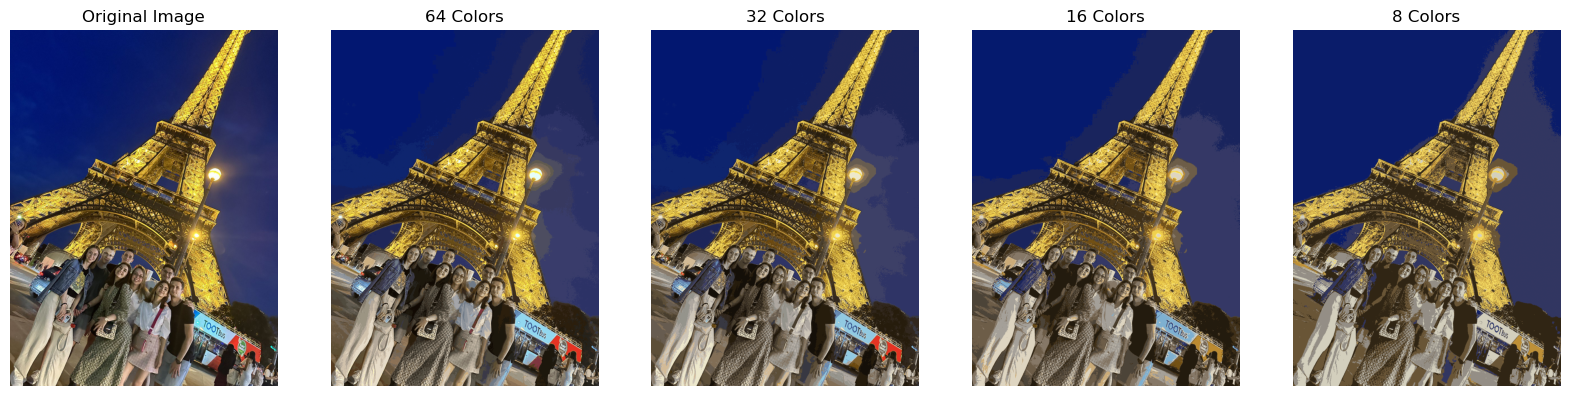

In [42]:
# Відображаємо квантізовані зображення
fig, axes = plt.subplots(1, len(color_levels) + 1, figsize=(20, 10))
axes[0].imshow(image_array)
axes[0].set_title("Original Image")
axes[0].axis("off")

for i, n_colors in enumerate(color_levels):
    quantized_image = color_quantization(image_array, n_colors)
    axes[i + 1].imshow(quantized_image)
    axes[i + 1].set_title(f"{n_colors} Colors")
    axes[i + 1].axis("off")

plt.show()

# 3. Text Classification

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re
import string

In [9]:
#Завантажимо дані
try:
    dt = pd.read_csv('finance_news.csv')
    print('Датасет завантажено успішно')
except FileNotFoundError:
    print('Файл не знайдено. Будь ласка, перевірте, чи правильно ви завантажили дані')
except Exception as e:
    print(f'Виникла проблема: {e}')

Датасет завантажено успішно


In [11]:
#Завантажимо перші рядки датасету 
dt.head()

sentiment                                               text
0  positive  All banks, lending institutions may allow a th...
1   neutral                              Not so fast, Drake...
2  positive  FNF - ong  19.43. Trailing Stop  21.04 from 6 ...
3  positive  Dow opens down almost 500 points after China h...
4  positive  U.S. weekly active oil-rig count edges up by 1...

In [13]:
#Перевіримо загальні дані датасету
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32583 entries, 0 to 32582
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  32583 non-null  object
 1   text       32569 non-null  object
dtypes: object(2)
memory usage: 509.2+ KB


In [15]:
#Перевіримо, який % пропущених значень
def count_missings(dt):
    missing_values = dt.isnull().sum()
    missing_percentage = (missing_values / len(dt)) * 100
    missing_dt = pd.concat([missing_values, missing_percentage], axis=1)
    missing_dt.columns = ['Missing Count', 'Missing %']
    missing_dt_sorted = missing_dt[missing_dt['Missing %'] > 0.01].sort_values(by='Missing %', ascending=False)
    
    return missing_dt_sorted

count_missings(dt)

Missing Count  Missing %
text             14   0.042967

In [17]:
#Видалимо пропущені значення
dt_cleaned = dt.dropna(subset=['text'])
dt_cleaned.isnull().sum()

sentiment    0
text         0
dtype: int64

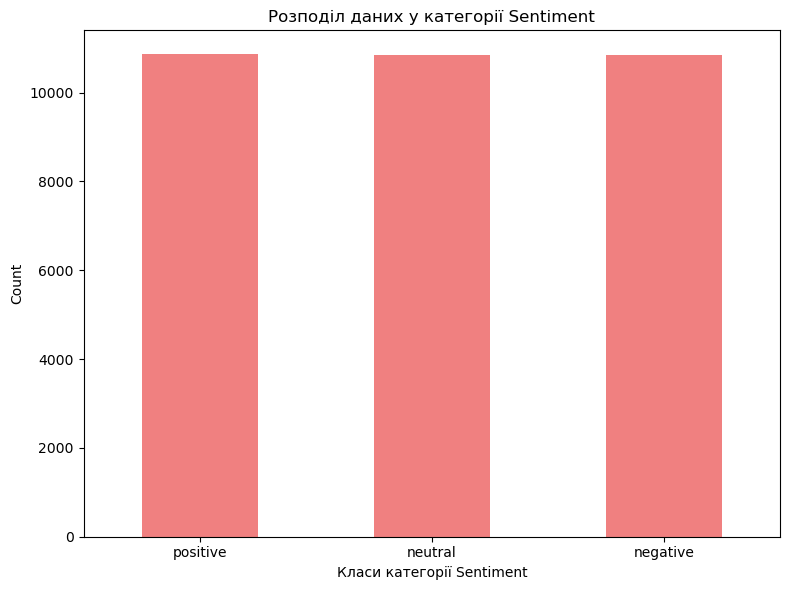

In [19]:
# Зобразимо стовпчикову діаграму для класів категорії sentiment
plt.figure(figsize=(8, 6))
dt_cleaned['sentiment'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Розподіл даних у категорії Sentiment')
plt.ylabel('Count')
plt.xlabel('Класи категорії Sentiment')
plt.xticks(rotation=0)
plt.tight_layout()

# Покажемо графік
plt.show()

Класи ідеально збалансовані

## Data Preprocessing

In [23]:
# Ініціалізація лематизатора, стеммера та списку стоп-слів
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Приведення до нижнього регістру
    text = text.lower()
    # Видалення @посилань, URL-адрес, хештегів, чисел, пунктуації, зайвих пробілів
    text = re.sub(r'@\S+|https*\S+|#\S+|\d', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s{2,}', ' ', text)

    # Видалення стоп-слів і лематизація та стемінг
    words = [word for word in text.split() if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    
    # Об'єднання слів в очищений текст
    text = ' '.join([word for word in words if word.isalpha()])

    return text

# Застосування функції до всього стовпця 'text'
dt_cleaned.loc[:, 'text'] = dt_cleaned['text'].apply(clean_text)

## WordCloud Vizualization

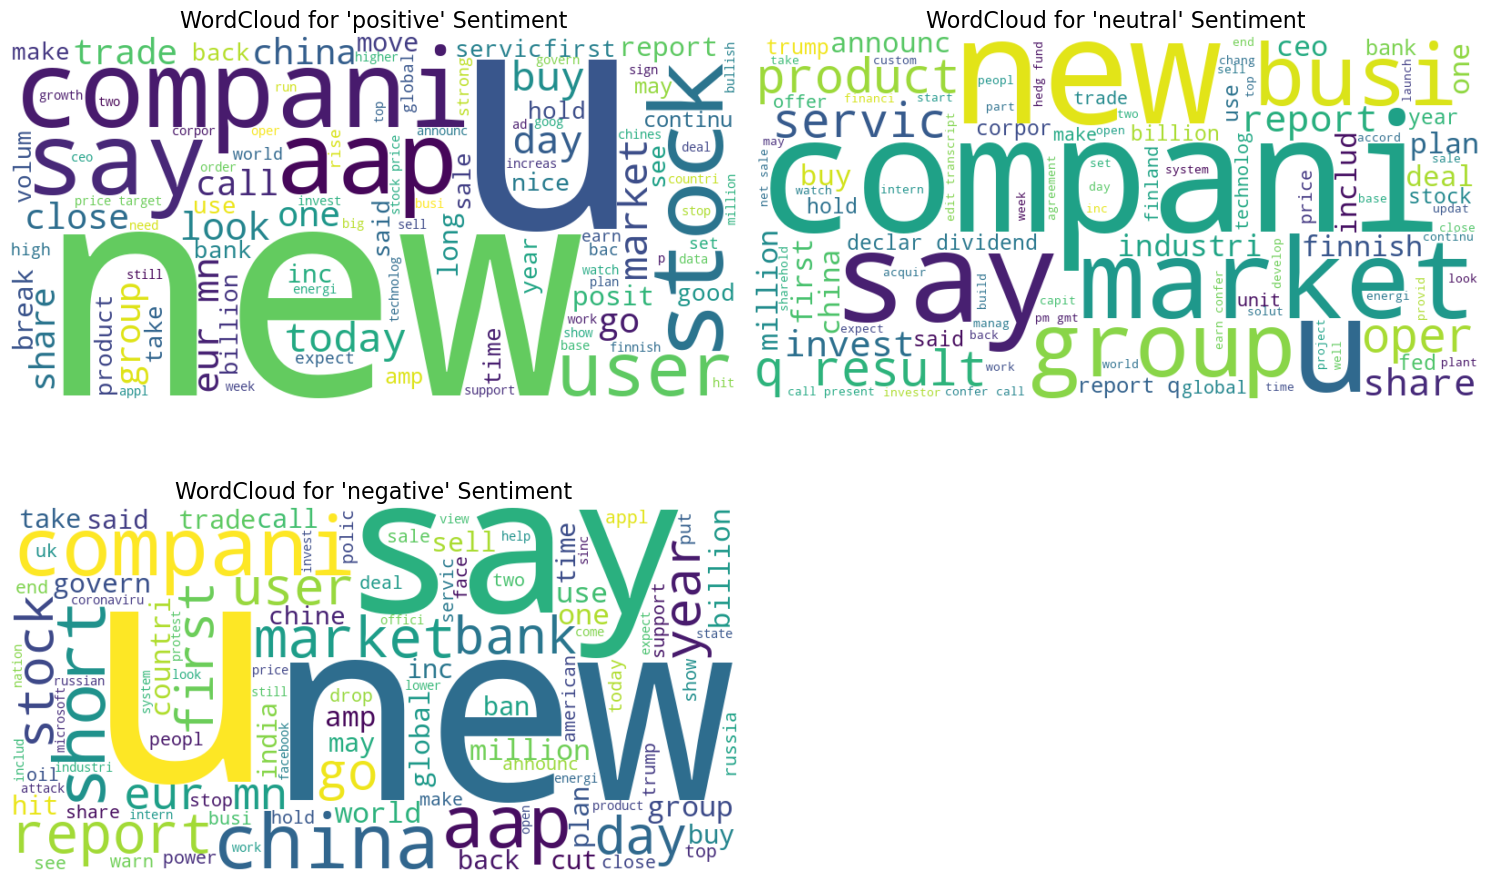

In [25]:
from wordcloud import WordCloud

# Створимо WordCloud для кожного класу тональності
sentiments = dt_cleaned['sentiment'].unique()

# Візуалізуємо WordCloud для кожного класу
plt.figure(figsize=(15, 10))
for i, sentiment in enumerate(sentiments, 1):
    # Отримуємо всі тексти для поточного класу тональності
    sentiment_text = ' '.join(dt_cleaned[dt_cleaned['sentiment'] == sentiment]['text'])
    
    # Створюємо WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(sentiment_text)
    
    # Відображаємо WordCloud
    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud for '{sentiment}' Sentiment", fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()

Слова "new", "company", "market", "say", "group" зустрічаються у всіх класах тональності, що свідчить про їх загальну поширеність у фінансових новинах. Ці терміни можуть не сильно допомагати класифікації, адже зустрічаються у всіх тональностях. Можливо, є сенс прибрати їх як додаткові стоп-слова

1. Позитивний контекст представлений словами "break", "high", "good", "increase"
2. Нейтральний -> словами "market", "company", "product", "report" (тому і не видалятимемо загальні терміни)
3. Негативний - > словами "cut", "sell", "attack", "hit".

## Vectorization with TFIDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ініціалізація TfidfVectorizer 
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Перетворимо стовпець 'text' на матрицю TF-IDF
X = vectorizer.fit_transform(dt_cleaned['text'])

# Виведемо розмір отриманої матриці, щоб побачити кількість текстів та кількість обраних фіч
X.shape

(32569, 5000)

## Text Classification

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Розділимо дані на тренувальний та тестовий набори
y = dt_cleaned['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [37]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix', plot_cm=True):
    """Відображення матриці плутанини."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show() 
    
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name, plot_cm=True):
    """Навчання моделі, оцінка і візуалізація результатів."""
    # Навчання моделі
    model.fit(X_train, y_train)

    # Передбачення на тестових даних
    y_pred = model.predict(X_test)

    # Оцінка моделі
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} accuracy score: {accuracy:.3f}")
    report = classification_report(y_test, y_pred)
    print(report)

    # Побудова матриці плутанини
    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix for {model_name}')

    return model, y_pred

## Logistic Regression

Logistic Regression accuracy score: 0.668
              precision    recall  f1-score   support

    negative       0.64      0.66      0.65      1085
     neutral       0.72      0.75      0.73      1086
    positive       0.64      0.60      0.62      1086

    accuracy                           0.67      3257
   macro avg       0.67      0.67      0.67      3257
weighted avg       0.67      0.67      0.67      3257



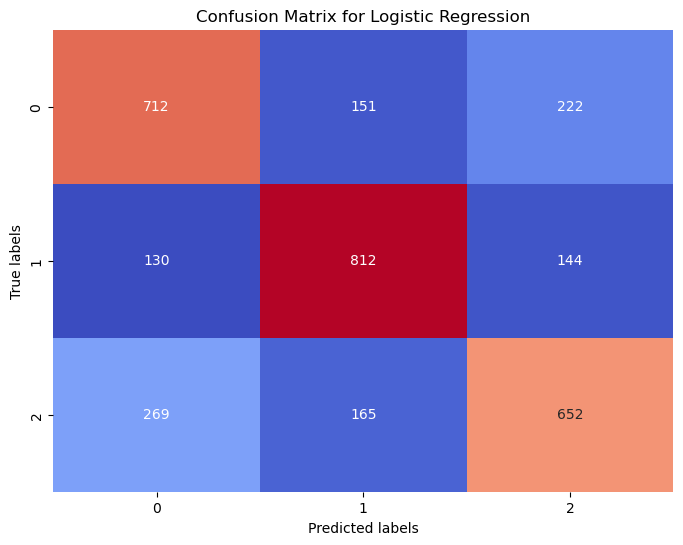

(LogisticRegression(max_iter=1000, random_state=42),
 array(['negative', 'negative', 'positive', ..., 'neutral', 'neutral',
        'neutral'], dtype=object))

In [80]:
# Налаштовуємо параметри
dt_model = LogisticRegression(max_iter=1000, random_state=42)
train_and_evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Logistic Regression') 

## Multinomial Naive Bayes

Multinomial Naive Bayes accuracy score: 0.632
              precision    recall  f1-score   support

    negative       0.60      0.64      0.62      1085
     neutral       0.69      0.69      0.69      1086
    positive       0.61      0.56      0.58      1086

    accuracy                           0.63      3257
   macro avg       0.63      0.63      0.63      3257
weighted avg       0.63      0.63      0.63      3257



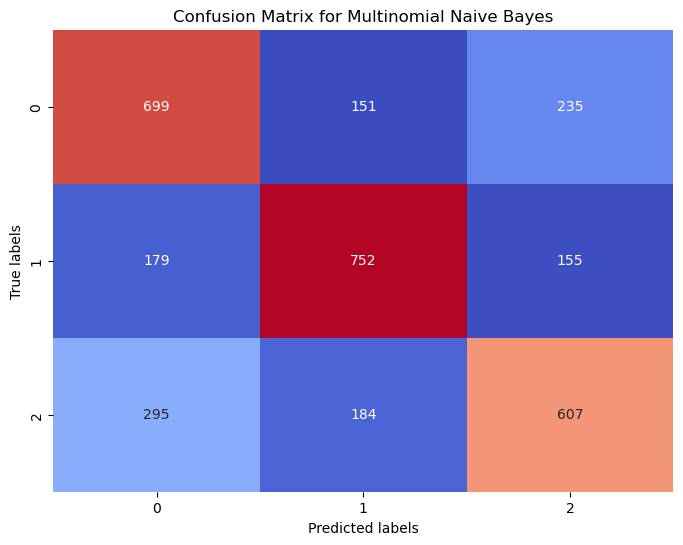

(MultinomialNB(alpha=1),
 array(['negative', 'positive', 'positive', ..., 'neutral', 'neutral',
        'neutral'], dtype='<U8'))

In [83]:
# Налаштовуємо параметри
dt_model = MultinomialNB(alpha=1, fit_prior=True) 
train_and_evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Multinomial Naive Bayes') 

## Decision Tree

Decision Tree accuracy score: 0.360
              precision    recall  f1-score   support

    negative       0.34      0.97      0.50      1085
     neutral       0.91      0.06      0.11      1086
    positive       0.66      0.05      0.10      1086

    accuracy                           0.36      3257
   macro avg       0.64      0.36      0.24      3257
weighted avg       0.64      0.36      0.24      3257



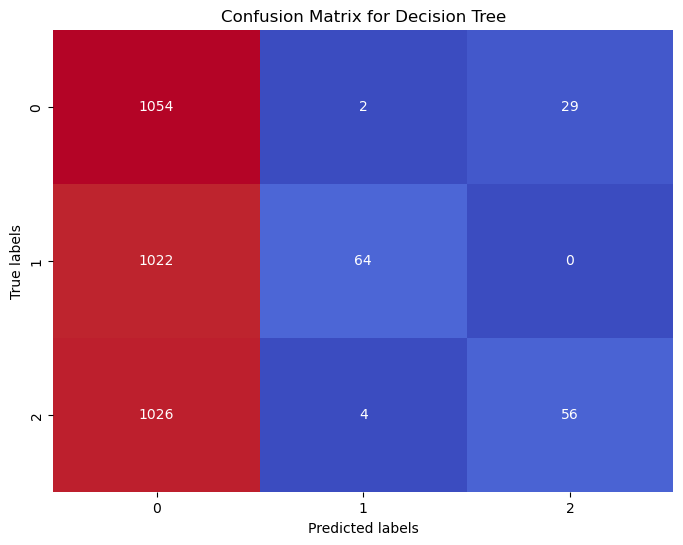

(DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
 array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
        'negative'], dtype=object))

In [86]:
# Налаштовуємо параметри
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
train_and_evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree') 

## Random Forest

Random Forest accuracy score: 0.544
              precision    recall  f1-score   support

    negative       0.62      0.44      0.51      1085
     neutral       0.48      0.80      0.60      1086
    positive       0.63      0.40      0.49      1086

    accuracy                           0.54      3257
   macro avg       0.58      0.54      0.53      3257
weighted avg       0.58      0.54      0.53      3257



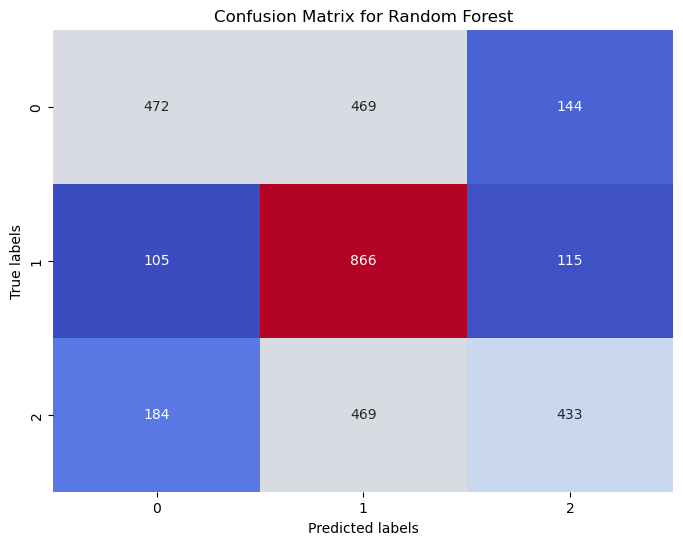

(RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42),
 array(['neutral', 'positive', 'positive', ..., 'positive', 'neutral',
        'neutral'], dtype=object))

In [89]:
#Налаштовуємо параметри
rf_model = RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)
train_and_evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')

## AdaBoost

AdaBoost accuracy score: 0.397
              precision    recall  f1-score   support

    negative       0.35      0.95      0.51      1085
     neutral       0.89      0.08      0.15      1086
    positive       0.74      0.15      0.25      1086

    accuracy                           0.40      3257
   macro avg       0.66      0.40      0.31      3257
weighted avg       0.66      0.40      0.31      3257



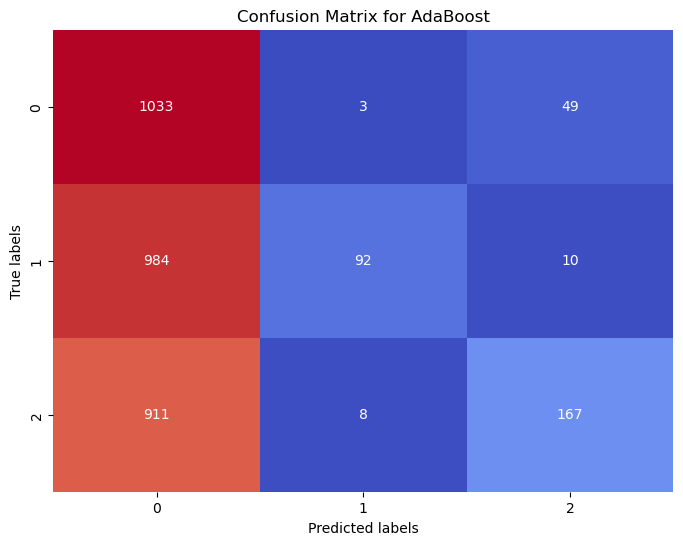

(AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=42),
 array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
        'negative'], dtype=object))

In [92]:
#Налаштовуємо параметри
ada_model = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
train_and_evaluate_model(ada_model, X_train, X_test, y_train, y_test, 'AdaBoost')

## SVM

SVM accuracy score: 0.672
              precision    recall  f1-score   support

    negative       0.64      0.68      0.66      1085
     neutral       0.73      0.74      0.73      1086
    positive       0.65      0.60      0.62      1086

    accuracy                           0.67      3257
   macro avg       0.67      0.67      0.67      3257
weighted avg       0.67      0.67      0.67      3257



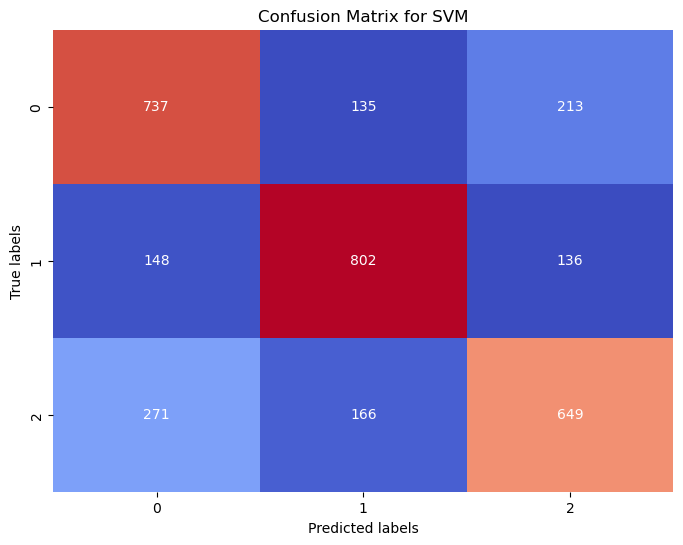

(SVC(C=1, gamma=0.1, kernel='linear', random_state=42),
 array(['negative', 'negative', 'positive', ..., 'neutral', 'neutral',
        'neutral'], dtype=object))

In [40]:
svm_model = SVC(kernel='linear', C=1, gamma=0.1, random_state=42)
train_and_evaluate_model(svm_model, X_train, X_test, y_train, y_test, 'SVM')

## kNN

kNN accuracy score: 0.619
              precision    recall  f1-score   support

    negative       0.59      0.63      0.61      1085
     neutral       0.65      0.70      0.67      1086
    positive       0.62      0.53      0.57      1086

    accuracy                           0.62      3257
   macro avg       0.62      0.62      0.62      3257
weighted avg       0.62      0.62      0.62      3257



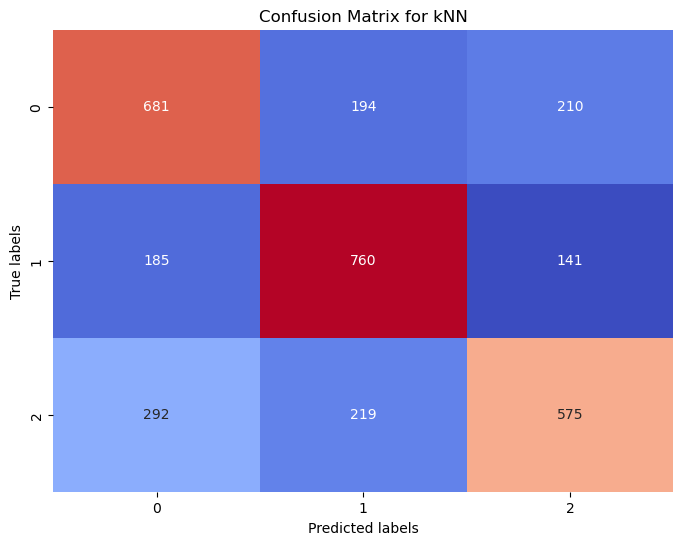

(KNeighborsClassifier(metric='cosine'),
 array(['negative', 'positive', 'neutral', ..., 'neutral', 'negative',
        'neutral'], dtype=object))

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='cosine')
train_and_evaluate_model(knn_model, X_train, X_test, y_train, y_test, 'kNN')

## Result

In [56]:
# Дані про точність (accuracy) різних моделей
results = {
    'Model': [
        'Logistic Regression',
        'Multinomial Naive Bayes',
        'Decision Tree', 
        'Random Forest', 
        'AdaBoost', 
        'SVM', 
        'KNN'
    ],
    'Accuracy': [
        0.668, 
        0.632, 
        0.360, 
        0.544, 
        0.397, 
        0.672, 
        0.619
    ]
}

# Створюємо DataFrame
dt_results = pd.DataFrame(results)

# Сортуємо за стовпцем 'Accuracy' у спадаючому порядку
dt_results_sorted = pd.DataFrame(dt_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True))
dt_results_sorted

Model  Accuracy
0                      SVM     0.672
1      Logistic Regression     0.668
2  Multinomial Naive Bayes     0.632
3                      KNN     0.619
4            Random Forest     0.544
5                 AdaBoost     0.397
6            Decision Tree     0.360

Найкращі результати для класифікації текстових даних показують SVM (з використанням лінійного ядра), Logistic Regression і Multinomial Naive Bayes.